# Data Science Tools 1 - Final Project 

## Wildfire Dataset

#### Nicole Pierick & Elizabeth Bob



## Import Packages & Libraries

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import missingno as msno
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

## Load the Dataset
WFIGS - Current Wildland Fire Perimeters Dataset from the Wildland Fire Interagency Geospatial Services (WFIGS) Group and National Interagency Fire Center 

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv("WFIGS_Wildland_Fire_Perimeters_Full_History.csv", sep = ",", dtype='unicode')

## Display the Dataset

In [4]:
data.head(100)

OBJECTID                       poly_IncidentName  \
0       127                                 Coleman   
1       128                                Patrick    
2       129                                 Low Top   
3       130                                 Sloan 2   
4       133                             Bloody nose   
5       136                                   Beach   
6       139                               Lava Rock   
7       141                           KUTCHER RIDGE   
8       142                                 MCCLUNG   
9       144                                 Sawdust   
10      145                Race Point South Blowout   
11      148                                   Range   
12      150                                 Elkhorn   
13      152                             Bull Canyon   
14      153                                    Luna   
15      157                           Little Coyote   
16      159                                   Slink   
17      163                                 Mailbox   
18      167                                  MARTIN   
19      168                             Cave Gulch    
20      170                                 Airport   
21      173                            Oregon Basin   
22      174                            BLACK KETTLE   
23      182                             Birch Creek   
24      183                                 Juniper   
25      186                                   Crews   
26      187                              Floyd Fire   
27      189                                  Ranch2   
28      191                               Picacho 2   
29      193                                 0364 RN   
30      194                             FB 63 South   
31      195                              Big Hollow   
32      196                                 Johnson   
33      197                                Wetlands   
34      200                            Kenyon Creek   
35      203                               West Hawk   
36      204                                   MM 7A   
37      207                                     Hot   
38      212                                  EASTON   
39      214                                RED BARN   
40      216                        Lake Catherine 2   
41      218                              LAC-168924   
42      220                                   ADOBE   
43      221                              Skin Creek   
44      223                                   LUTIE   
45      229                                  Sierra   
46      232                              LAC-123030   
47      234                           Spanish Trail   
48      236                               Horseshoe   
49      238                                   Rocky   
50      241                            Penrose Fire   
51      249                                 Chicken   
52      250                                 Sloan 5   
53      251                                  Coburn   
54      252                                   Ridge   
55      255                                   Quail   
56      256                      NORTH BROWNSTOWN 3   
57      257                                Sloan 23   
58      258                                    Wash   
59      264                           Fort Bridger    
60      268                             Green Trail   
61      272                                      65   
62      274                            2021-161-005   
63      275                                  Sunset   
64      276                                MULBERRY   
65      278                                    Bull   
66      281                              Little Toe   
67      283                        HOT SPRINGS 2020   
68      284                                 Plumtaw   
69      286                                    Moon   
70      287                          Margies Assist   
71      289                           Hidde

#### Display dataset columns, non-null counts, & data types 

In [5]:
data.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13556 entries, 0 to 13555
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    OBJECTID                        13556 non-null  object
 1    poly_IncidentName               13427 non-null  object
 2    poly_FeatureCategory            13556 non-null  object
 3    poly_MapMethod                  13539 non-null  object
 4    poly_GISAcres                   10620 non-null  object
 5    poly_CreateDate                 13556 non-null  object
 6    poly_DateCurrent                13509 non-null  object
 7    poly_PolygonDateTime            9611 non-null   object
 8    poly_Acres_AutoCalc             13498 non-null  object
 9    poly_GlobalID                   13498 non-null  object
 10   poly_Source                     13556 non-null  object
 11   irwin_ABCDMisc                  975 non-null    object
 12   irwin_ADSPermissionState      

## Cleaning the Dataset

In [6]:
# Remove leading and trailing spaces
data.columns = data.columns.str.strip()

In [7]:
# Standardize text across rows and columns
data = data.applymap(lambda x: x.lower().strip() if type(x) == str else x)

In [8]:
# Check for duplicate rows
data.duplicated().any()

False

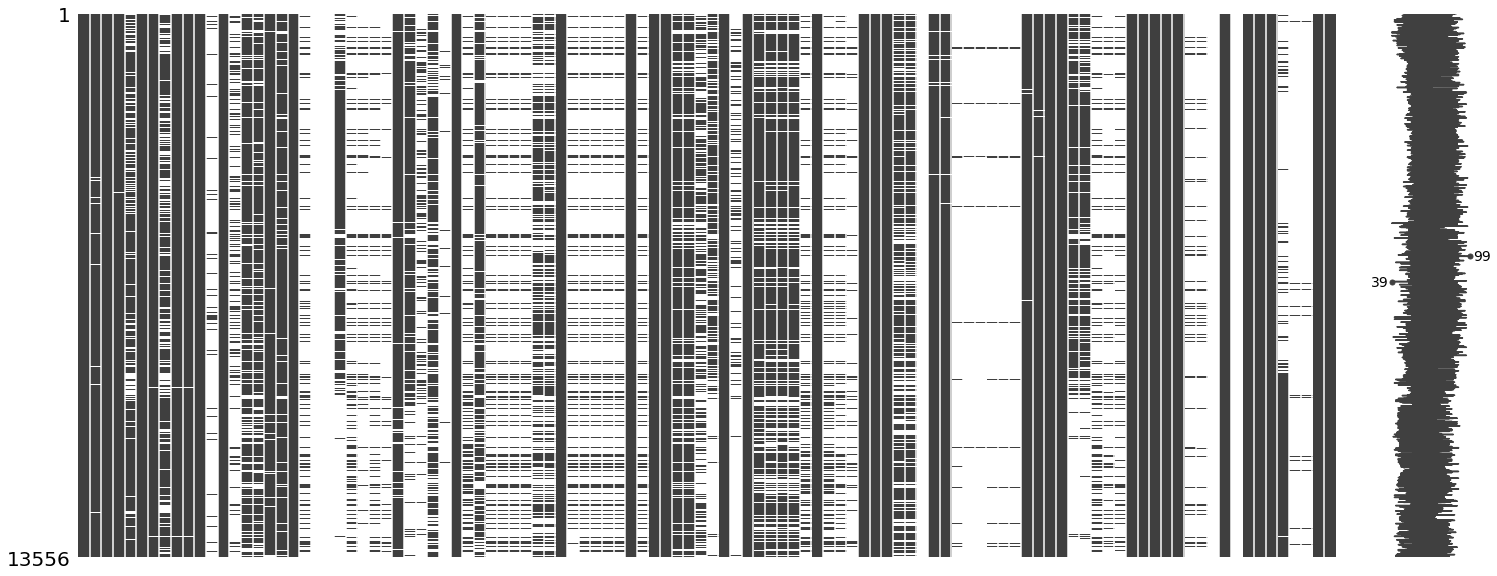

In [9]:
# Visualize null values as matrix
msno.matrix(data);

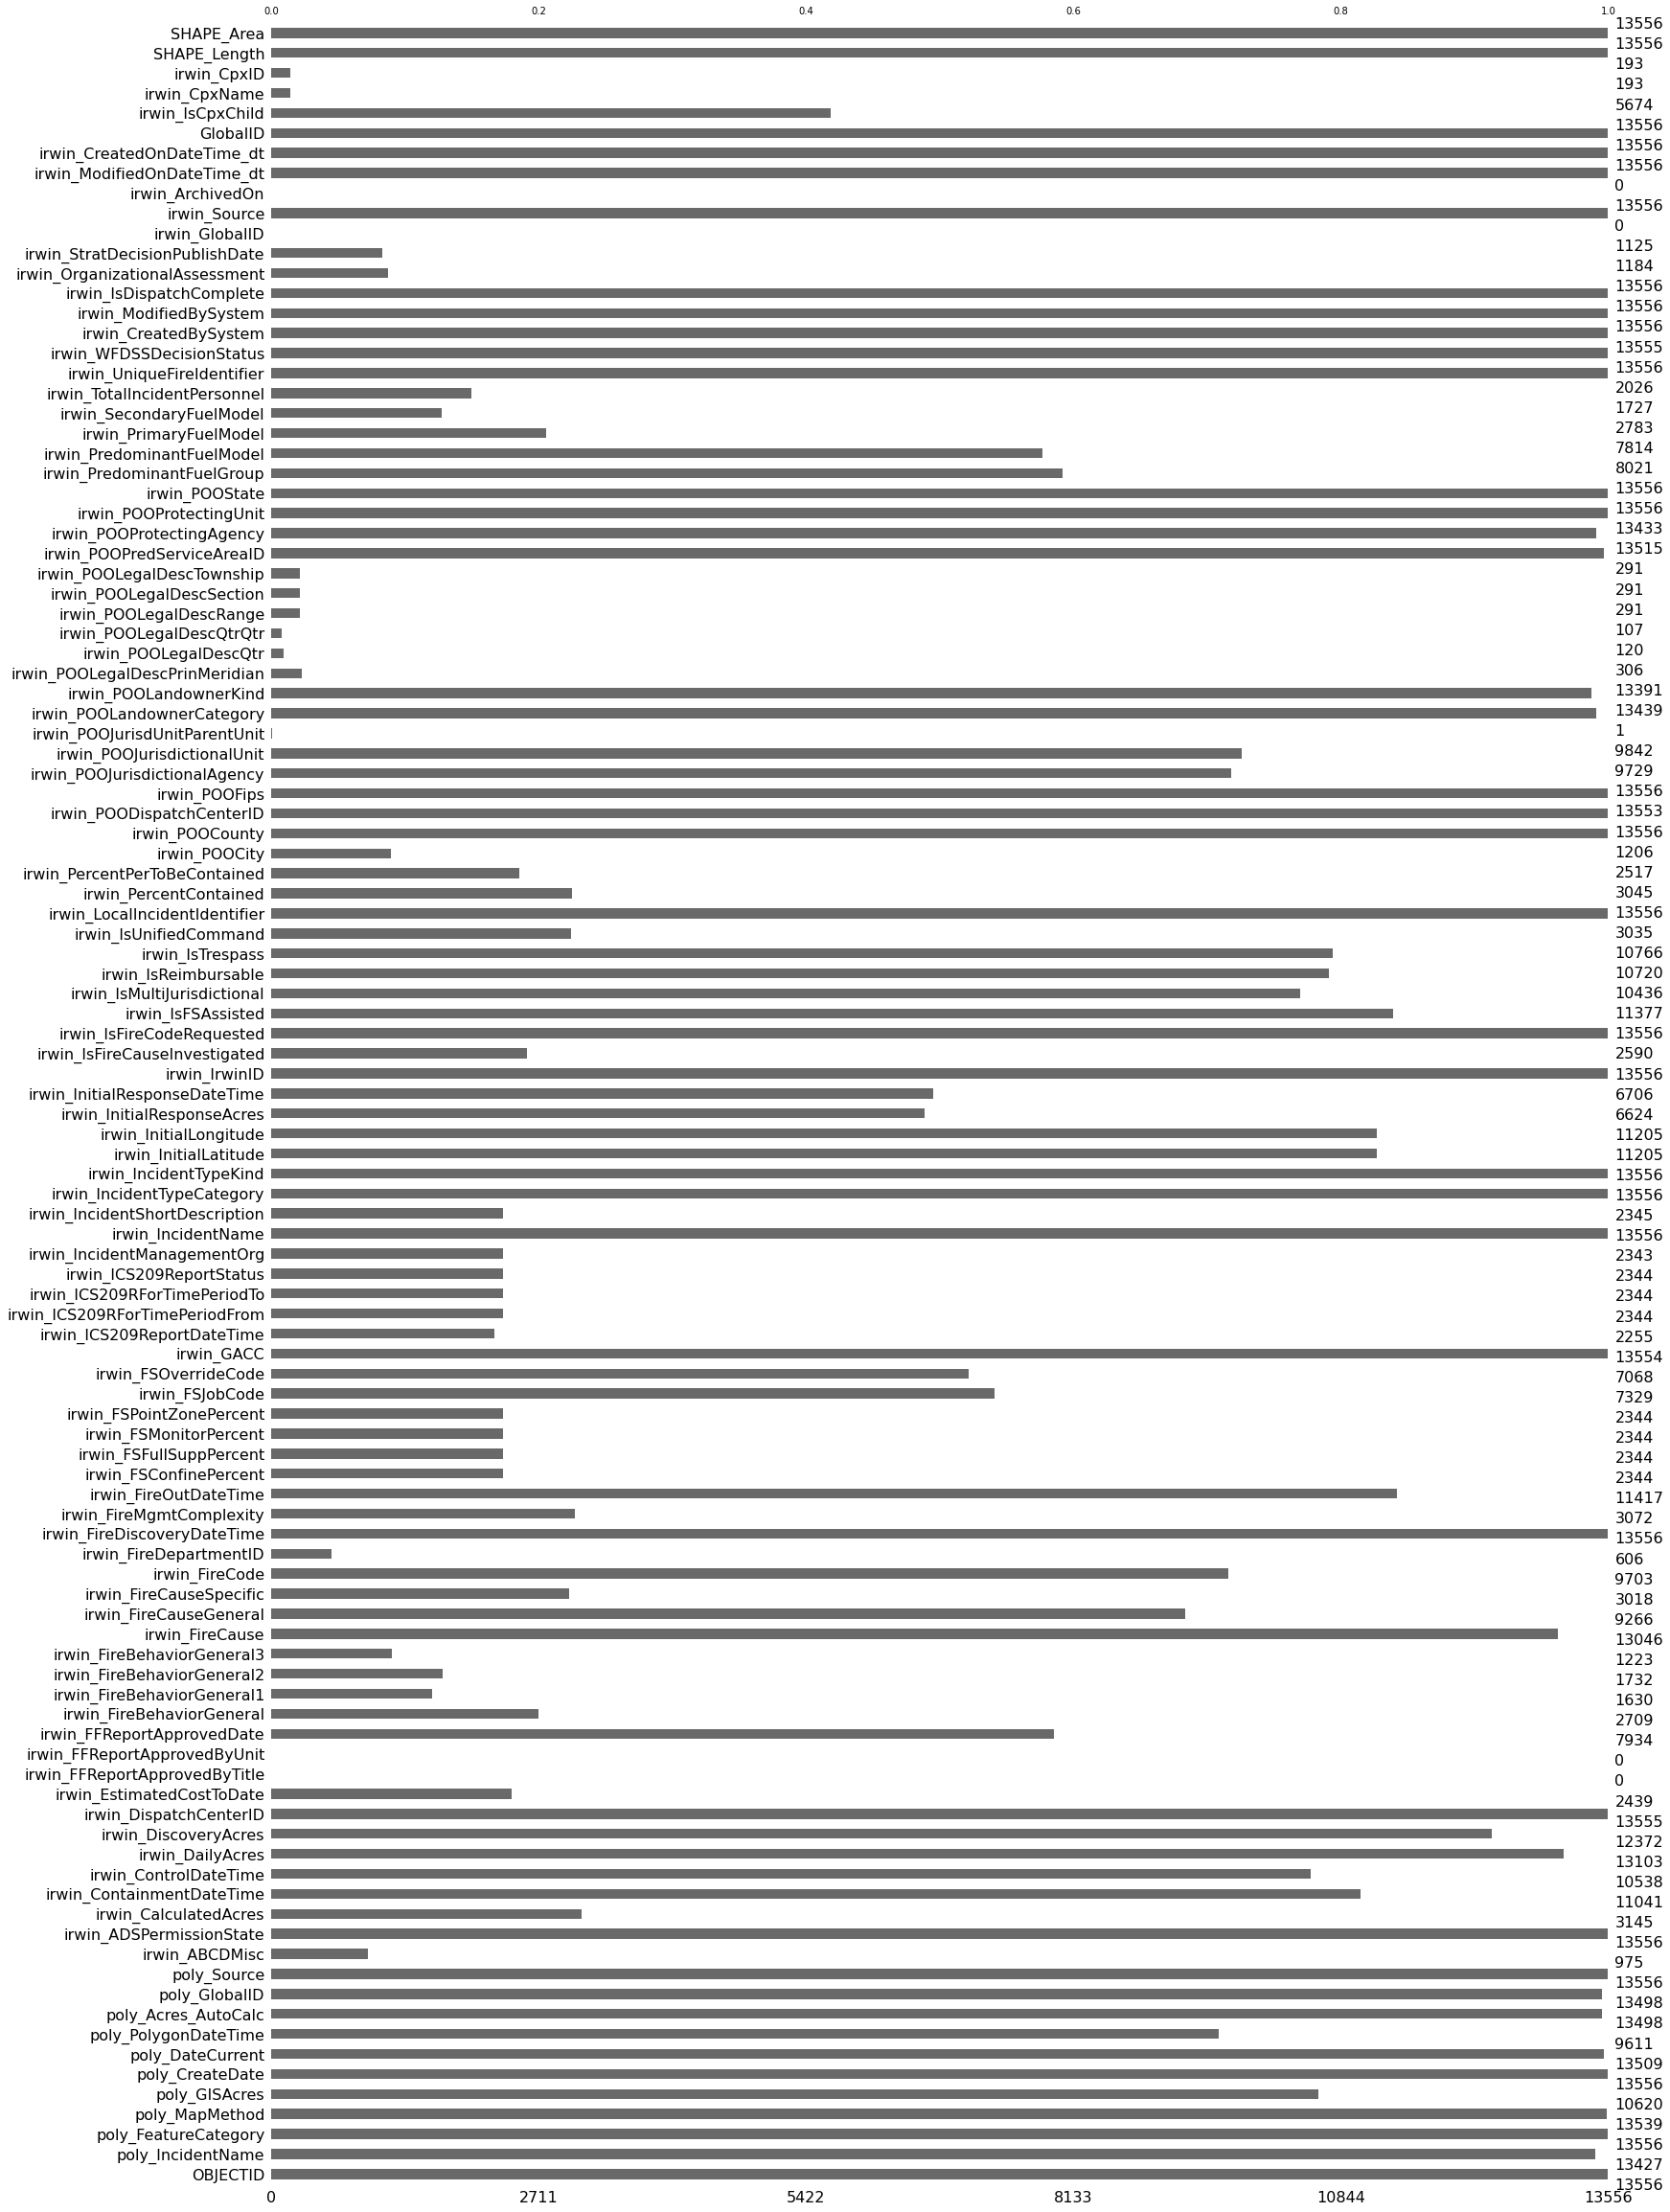

In [9]:
# Visualize null values as bar plot
msno.bar(data);

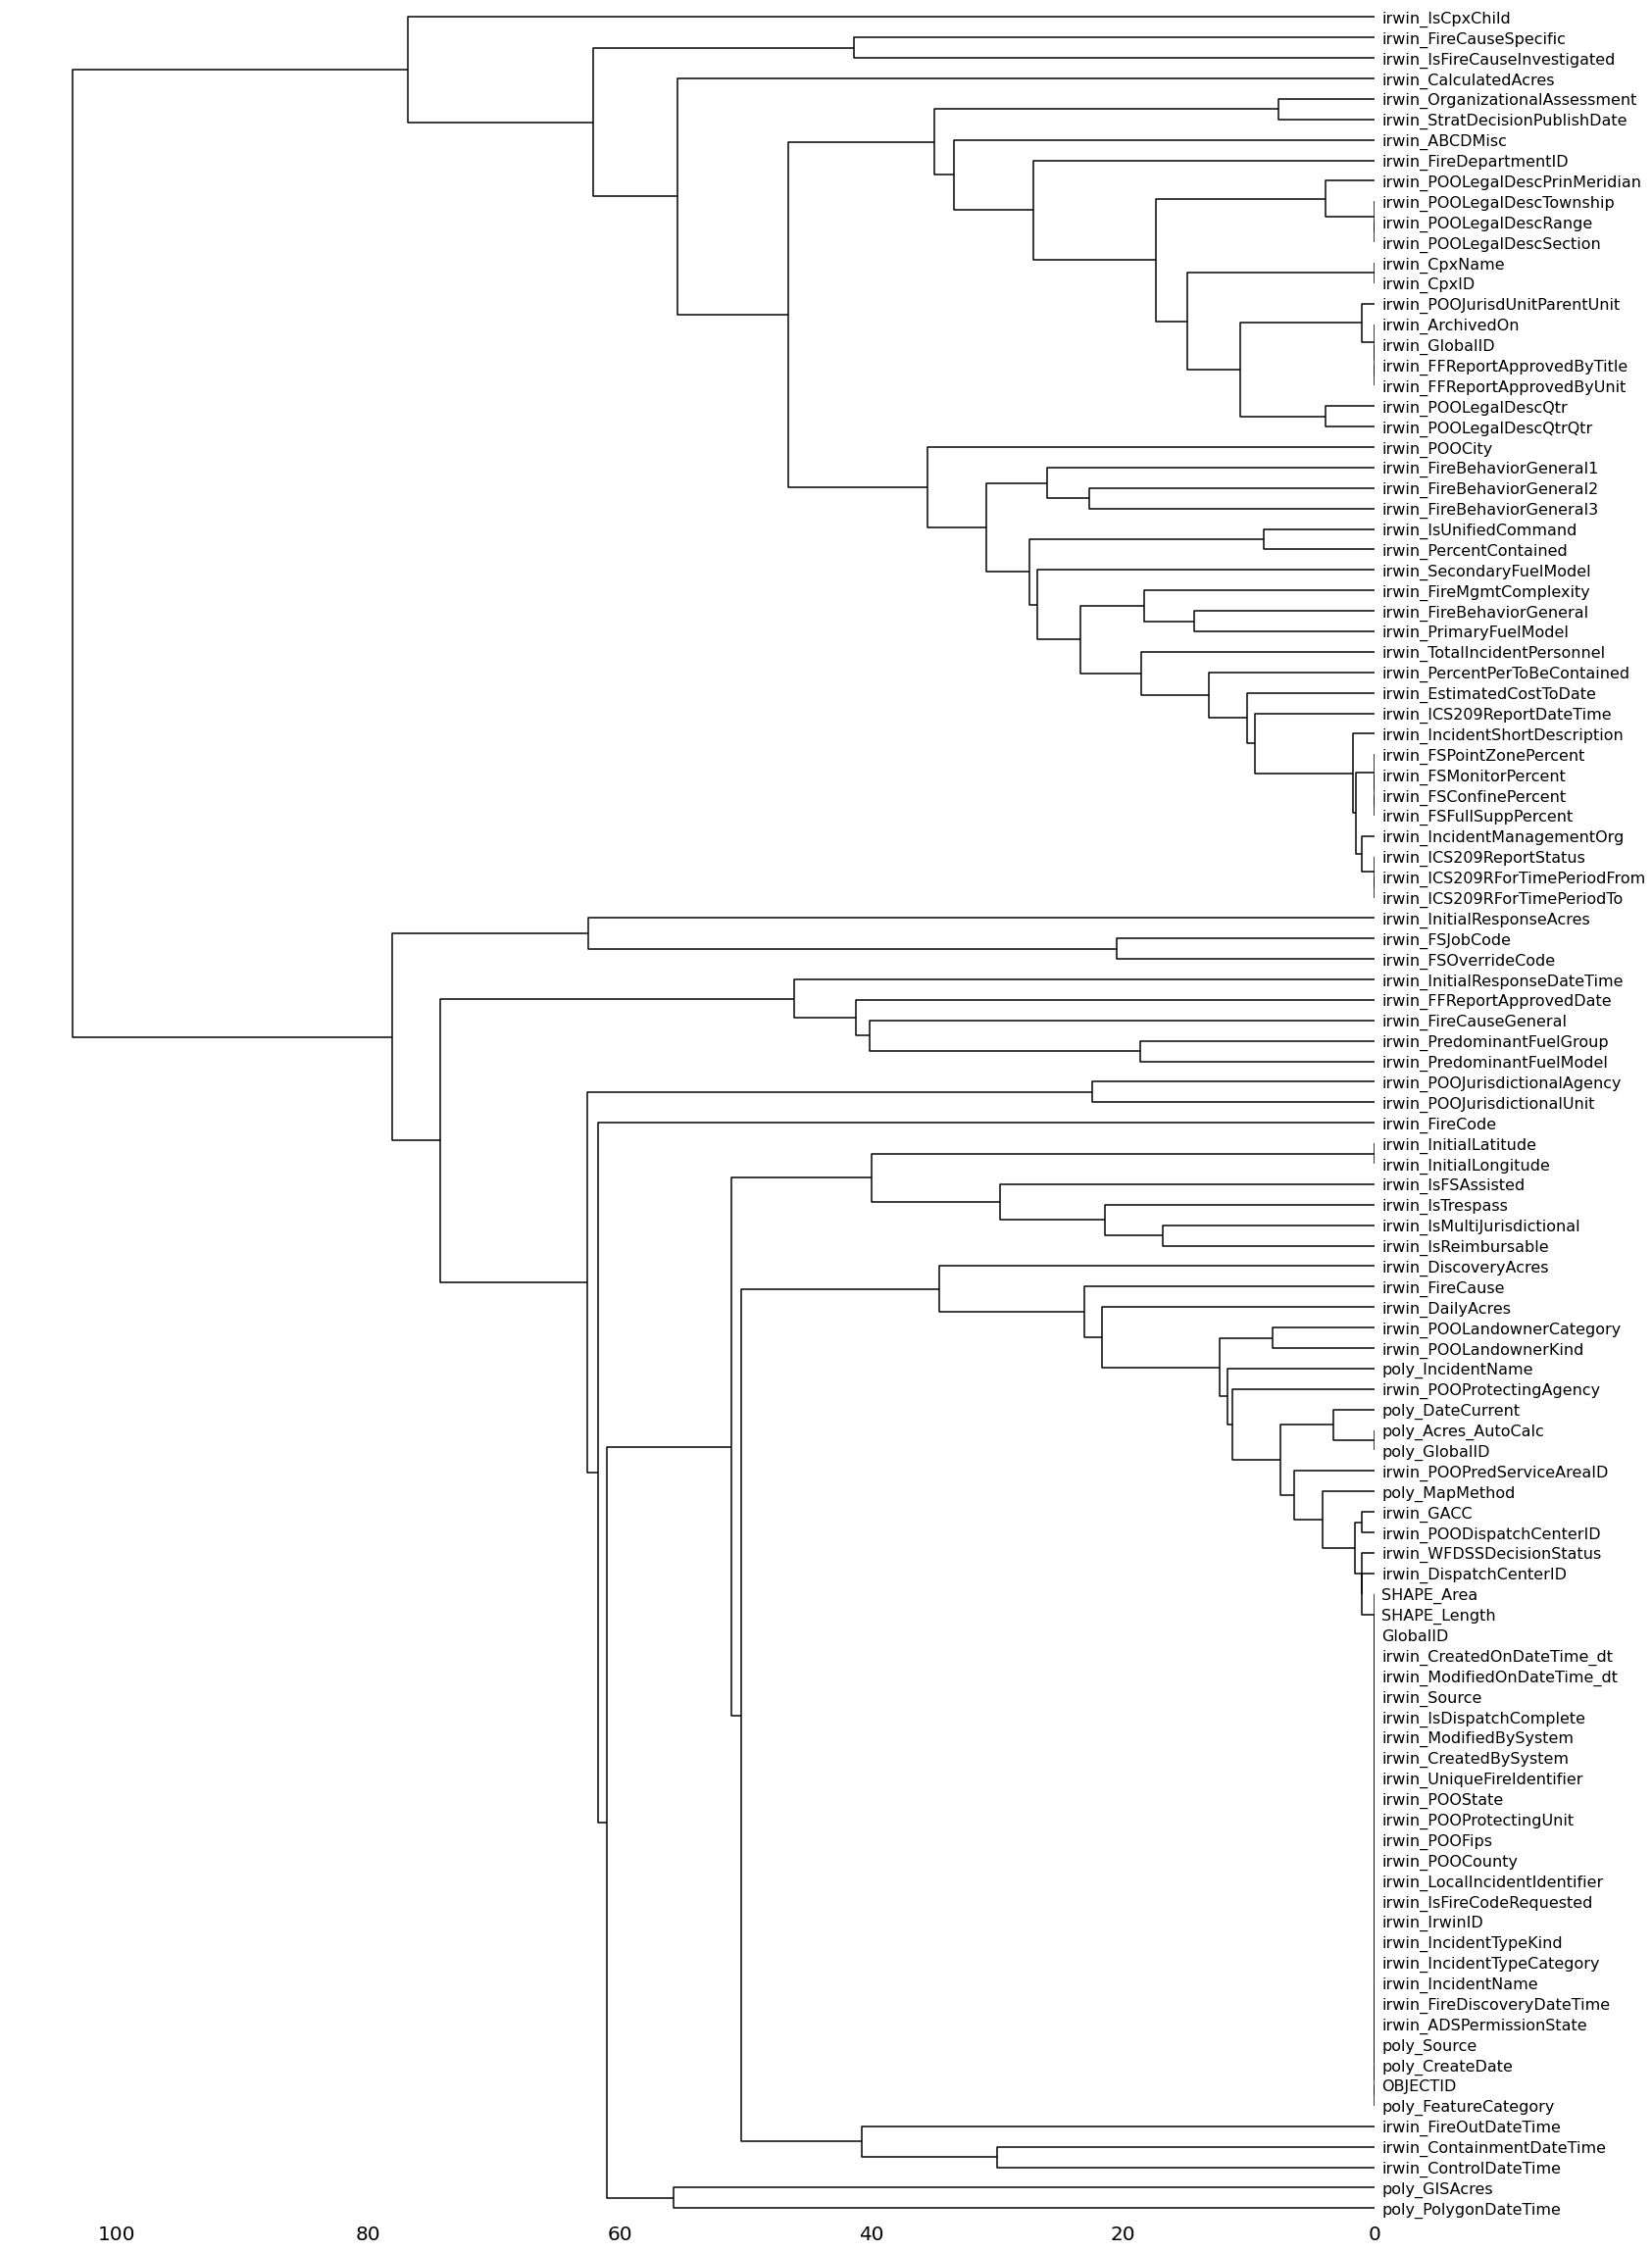

In [10]:
msno.dendrogram(data);

In [11]:
# Drop columns where 75% or more of values are missing
data = data.dropna(thresh = 0.75*len(data), axis = 1)

# Drop columns that are not relevant for the current analysis
data = data.drop(data.columns[np.r_[2:4, 5:7, 8:11, 15, 19, 21:23, 25:32, 33:35, 37:40, 41:50]], axis=1)

In [12]:
# Dataset contains two features reflecting incident name
# irwin_IncidentName contains fewer null values
# Compare values to determine whether poly_IncidentName can be safely dropped
pd.set_option('display.width', 200)
print(data[['poly_IncidentName', 'irwin_IncidentName']].loc[data['poly_IncidentName'] != data['irwin_IncidentName']])
#data = data.drop(data['poly_IncidentName'], axis = 1)

                                       poly_IncidentName                            irwin_IncidentName
10                              race point south blowout                 race point south blowout fire
12                                               elkhorn                                   shf elkhorn
50                                          penrose fire                                       penrose
72                                          bozarth fire                                       bozarth
75                                     inchelium highway                              inchelium  hiway
81                                               59 road                                    highway 59
94                                              ute fire                                           ute
97                butte, tehama, glenn lightning complex                                          1-12
99                                          logging fire                 

In [13]:
# Dataset contains two features reflecting acreage
# poly_Acres_AutoCalc contains fewer null values
# Compare values to determine whether poly_GISAcres can be safely dropped
print(data[['poly_GISAcres', 'poly_Acres_AutoCalc']].loc[data['poly_GISAcres'] != data['poly_Acres_AutoCalc']])
#data = data.drop(data['poly_GISAcres'], axis = 1)

              poly_GISAcres   poly_Acres_AutoCalc
0          562.913504426158      562.911767294885
1         0.151680183041868     0.151679658701826
2                       0.3      2.85069129790169
3          44.3005169806328      44.3003519242799
4                       NaN      6.21136682856688
5                      0.93     0.934468211073125
6                       0.1      100.415640980296
7                         1      21.2599339015124
8                         1      1.39069382848944
9                       0.8      6.79716766753429
10                      NaN     0.324307185181966
11         3496.26612994637      3498.79892587818
12            51576.7440128      51617.2199263135
13                     4.86      4.85999377956288
14         10133.9550011507      10141.7644498413
15                      NaN      1.14169505782212
16         26751.7555383592      26751.6780553972
17                      NaN      5.36239336325832
18                      0.1      91.8194114427307


In [14]:
# Display updated dataset columns, non-null counts, & data types
data.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13556 entries, 0 to 13555
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   OBJECTID                     13556 non-null  object
 1   poly_IncidentName            13427 non-null  object
 2   poly_GISAcres                10620 non-null  object
 3   poly_Acres_AutoCalc          13498 non-null  object
 4   irwin_ContainmentDateTime    11041 non-null  object
 5   irwin_ControlDateTime        10538 non-null  object
 6   irwin_DailyAcres             13103 non-null  object
 7   irwin_DiscoveryAcres         12372 non-null  object
 8   irwin_FireCause              13046 non-null  object
 9   irwin_FireDiscoveryDateTime  13556 non-null  object
 10  irwin_FireOutDateTime        11417 non-null  object
 11  irwin_IncidentName           13556 non-null  object
 12  irwin_InitialLatitude        11205 non-null  object
 13  irwin_InitialLongitude       11

#### Modify data types

In [17]:
# Convert appropriate columns to string
data[['OBJECTID', 'poly_IncidentName', 'irwin_FireCause', 'irwin_IncidentName', 'irwin_POOCounty', 
    'irwin_POOLandownerCategory', 'irwin_POOLandownerKind', 'irwin_POOState']] = data[['OBJECTID', 
    'poly_IncidentName', 'irwin_FireCause', 'irwin_IncidentName', 'irwin_POOCounty', 
    'irwin_POOLandownerCategory', 'irwin_POOLandownerKind', 'irwin_POOState']].astype('string')

# Convert appropriate columns to float
data[['poly_GISAcres', 'poly_Acres_AutoCalc', 'irwin_DailyAcres', 'irwin_DiscoveryAcres', 'irwin_InitialLatitude',
    'irwin_InitialLongitude', 'SHAPE_Length', 'SHAPE_Area']] = data[['poly_GISAcres', 'poly_Acres_AutoCalc', 
    'irwin_DailyAcres', 'irwin_DiscoveryAcres', 'irwin_InitialLatitude', 'irwin_InitialLongitude', 
    'SHAPE_Length', 'SHAPE_Area']].astype('float64')

# Convert appropriate columns to datetime
data[['irwin_ContainmentDateTime', 'irwin_ControlDateTime', 'irwin_FireDiscoveryDateTime', 
    'irwin_FireOutDateTime']] = data[['irwin_ContainmentDateTime', 'irwin_ControlDateTime', 
    'irwin_FireDiscoveryDateTime', 'irwin_FireOutDateTime']].apply(pd.to_datetime)

In [18]:
# Display modifed data types
data.dtypes

OBJECTID                                    string
poly_IncidentName                           string
poly_GISAcres                              float64
poly_Acres_AutoCalc                        float64
irwin_ContainmentDateTime      datetime64[ns, UTC]
irwin_ControlDateTime          datetime64[ns, UTC]
irwin_DailyAcres                           float64
irwin_DiscoveryAcres                       float64
irwin_FireCause                             string
irwin_FireDiscoveryDateTime    datetime64[ns, UTC]
irwin_FireOutDateTime          datetime64[ns, UTC]
irwin_IncidentName                          string
irwin_InitialLatitude                      float64
irwin_InitialLongitude                     float64
irwin_POOCounty                             string
irwin_POOLandownerCategory                  string
irwin_POOLandownerKind                      string
irwin_POOState                              string
SHAPE_Length                               float64
SHAPE_Area                     

In [19]:
# Extract state from irwin_POOState and create new column
data['State'] = data['irwin_POOState'].str.split('-').str[1]

In [21]:
# Creates year and month columns from Discovery Date Column 
data['Year'] = data['irwin_FireDiscoveryDateTime'].dt.year
data['Month'] = data['irwin_FireDiscoveryDateTime'].dt.month

In [22]:
# Calculate duration of fire in days and create new column 
data['fire_Duration'] = data['irwin_ControlDateTime'] - data['irwin_FireDiscoveryDateTime']
data['fire_Duration'] = data['fire_Duration'].dt.total_seconds()/60/60/24

In [23]:
# Impute missing fire_Duration values using multivariate imputation by chained equation (MICE)
lr = LinearRegression()

def mice(df_col):
    mice_imputer = IterativeImputer(estimator = lr, missing_values = np.nan, max_iter = 10, verbose = 2, 
                                    imputation_order = 'ascending',random_state = 42)
    mice_imputed = mice_imputer.fit_transform((df_col).array.reshape(-1, 1))
    return mice_imputed

data['fire_Duration'] = mice(data['fire_Duration'])

In [24]:
# Descriptive statistics for fire duration 
data['fire_Duration'].describe()

count    13556.000000
mean         8.952713
std         20.040359
min          0.000000
25%          0.667708
50%          3.725069
75%          8.952713
max        363.987488
Name: fire_Duration, dtype: float64

In [25]:
# Median for fire duration
median = data['fire_Duration'].median()
print('median', round(median, 6))

median 3.725069


In [ ]:
# Use auto calc acreage
# Aggregate fires by state and compare time, acreage, etc.???
# Correlation between features (state vs. acreage or time, lat/long vs. acreage or time???
# It looks like there are multiple incidents that share the same name but the rows aren't duplicates- 
#could mean either the same name was used for two distinct fires or two fires occurred in the same area?

## Pivot Tables

In [26]:
# Pivot Table showing Fire duration and Acres by State
pivot = np.round(pd.pivot_table(data, values=['poly_Acres_AutoCalc', 'fire_Duration'], 
                                index=['State'], 
                                aggfunc=np.mean,
                                fill_value=0),2)
                                
pivot = pivot.reindex(pivot['poly_Acres_AutoCalc'].sort_values(ascending=False).index)

pivot.style.bar(color='#d65f5f')

In [28]:
# Pivot Table of mean, median, and sum of Fire_Duration and Acres by year
# 2016 - 2019 excluded from the table
np.round(pd.pivot_table((data[data['Year'].isin([2020,2021,2022])]), values=['poly_Acres_AutoCalc','fire_Duration'], 
                                index=['Year'], 
                                aggfunc=[np.mean, np.median, np.sum],
                                fill_value=0),2)

mean                            median                               sum                    
     fire_Duration poly_Acres_AutoCalc fire_Duration poly_Acres_AutoCalc fire_Duration poly_Acres_AutoCalc
Year                                                                                                      
2020          8.09             2237.50          2.33               10.93      32612.93          9012630.70
2021          9.98             1420.77          2.98                5.92      51621.48          7278621.17
2022          8.54             1545.69          5.65                9.77      37040.59          6705214.23

In [30]:
# Pivot Table of mean, median, and sum of Fire_Duration and Acres by year and month
# 2016 - 2019 excluded from the table
np.round(pd.pivot_table((data[data['Year'].isin([2020,2021,2022])]), values=['poly_Acres_AutoCalc','fire_Duration'], 
                                index=['Year', 'Month'], 
                                aggfunc=[np.mean, np.median, np.sum],
                                fill_value=0),2)

mean                            median                               sum                    
           fire_Duration poly_Acres_AutoCalc fire_Duration poly_Acres_AutoCalc fire_Duration poly_Acres_AutoCalc
Year Month                                                                                                      
2020 1              4.94              426.89          3.40               18.70        202.70            17502.62
     2              5.47              678.63          3.56               26.93        470.08            58361.82
     3              6.97              202.15          3.76               17.22       1603.50            46291.78
     4              4.43               60.17          2.09                5.07       1106.68            15041.62
     5              5.18              592.43          1.71                3.53       1941.80           221567.02
     6              9.12             1435.66          2.15               11.14       5556.85           874319.49
     7              6.16             1033.45          1.67                7.33       4936.91           825726.75
     8             10.71             4447.07          3.01               13.89       9454.61          3926761.90
     9             12.05             7958.85          2.18               13.71       4001.50          2642338.27
     10             9.80             1687.00          3.07               18.71       1871.52           322217.89
     11             6.18              256.83          4.79               14.26       1081.73            44945.40
     12             6.53              297.56          6.04               17.19        385.05            17556.15
2021 1              5.19              448.37          2.85                9.01        508.29            43043.59
     2             12.28              300.41          5.87               21.96       1325.81            32143.85
     3              6.55              625.08          4.00               15.49       4105.17           389426.74
     4              5.58              204.30          1.86                5.31       4097.80           149141.89
     5              5.36              457.72          0.88                2.03       2975.68           252660.79
     6             10.00             1236.70          2.08                5.08       8009.92           980702.15
     7             18.22             3460.73          3.78                7.33      19004.71          3602622.59
     8             11.24             2169.71          2.94                3.67       7454.76          1427670.65
     9              8.18             1014.40          5.03                3.86       1906.58           235340.77
     10             7.37              758.90          2.95                2.11        788.33            78925.46
     11             7.54              118.69          8.95                7.50        851.50            13056.26
     12             6.74              959.56          6.93               31.40        592.94            73886.43
2022 1              7.52              169.77          5.16               18.38       1067.82            24107.61
     2             14.40              245.10          4.18               19.52       3096.35            52696.15
     3              9.34             1097.47          6.02               26.59       4204.54           493863.59
     4              8.36             1543.13          8.95                9.21       3860.61           712925.59
     5              8.09             1484.60          8.07                2.73       4344.50           797231.38
     6             13.66             5150.67          8.09                8.17       7582.43          2858620.41
     7              7.88              781.38          4.78                9.40       7535.03           747003.43
     8              5.34              994.25          4.17                9.06       4274.33           795400.80
     9              4.86             1010.70          4.03       

## Countplots

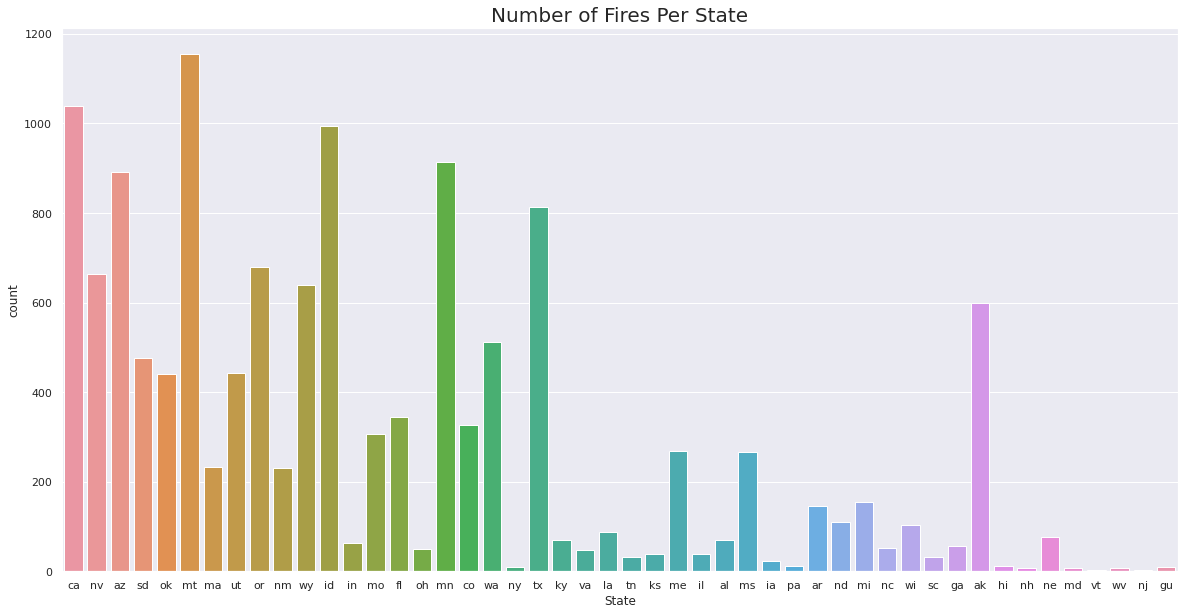

In [21]:
# countplot - fires per state
sns.set(rc={"figure.figsize":(20, 10)}) 
ax = sns.countplot(x='State', data=data)
plt.title('Number of Fires Per State', fontsize=20)
plt.show()

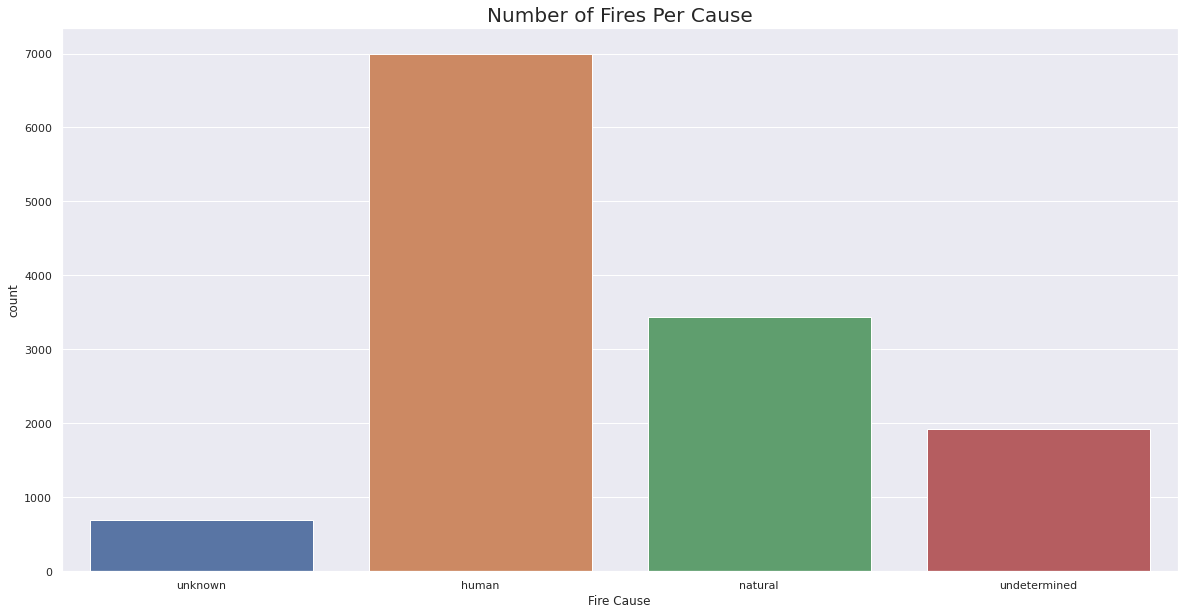

In [22]:
# countplot - fire cause
sns.set(rc={"figure.figsize":(20, 10)}) 
ax = sns.countplot(x='irwin_FireCause', data=data)
plt.title('Number of Fires Per Cause', fontsize=20)
plt.xlabel('Fire Cause')
plt.show()

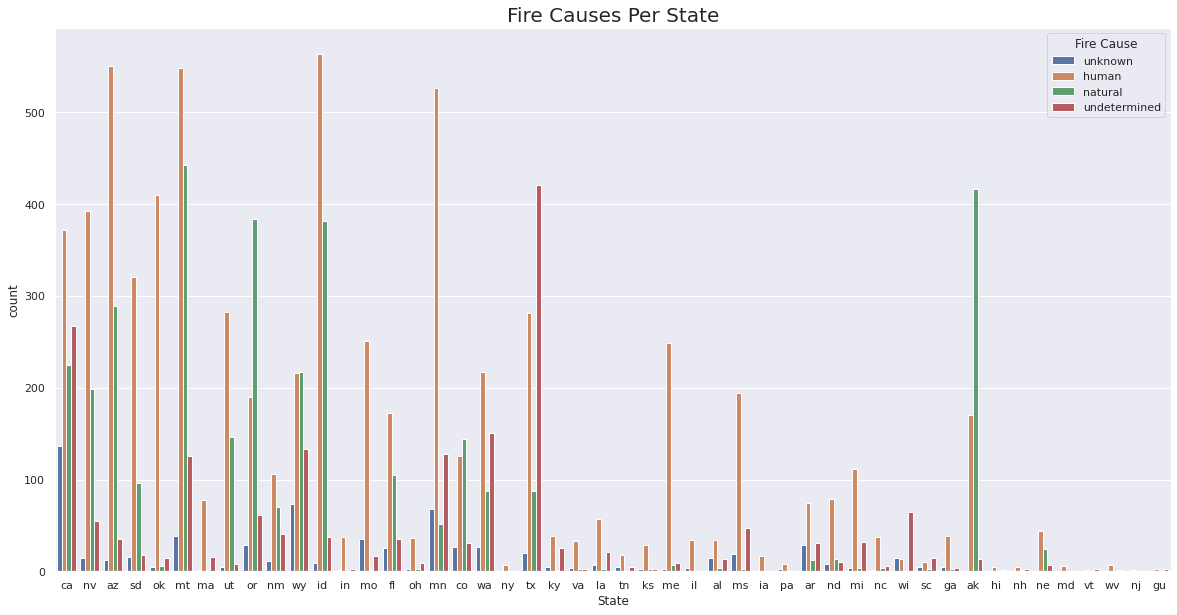

In [23]:
# countplot - fires per state
sns.set(rc={"figure.figsize":(20, 10)}) 
ax = sns.countplot(x='State', data=data, hue='irwin_FireCause')
plt.title('Fire Causes Per State', fontsize=20)
plt.legend(title='Fire Cause', loc='upper right')
plt.show()

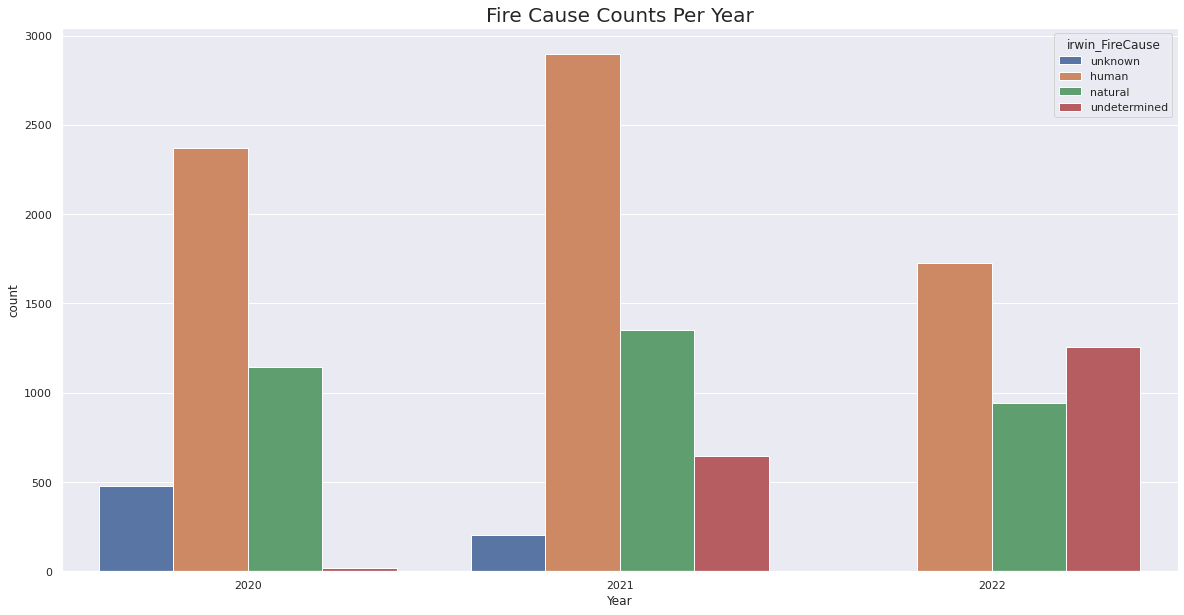

In [31]:
# countplot - fire cause counts per year
# 2016 - 2019 excluded from the table
sns.set(rc={"figure.figsize":(20, 10)}) 
ax = sns.countplot(x='Year', hue='irwin_FireCause', data=(data[data['Year'].isin([2020,2021,2022])]))
plt.title('Fire Cause Counts Per Year', fontsize=20)
plt.show()

## Bar Plots

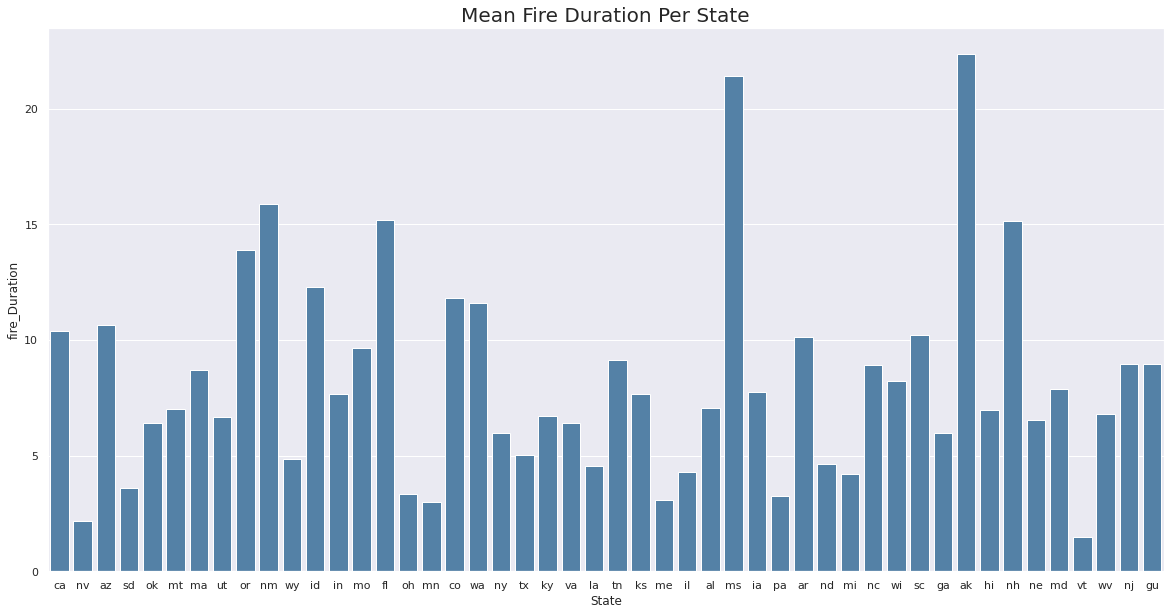

In [54]:
# bar plot of mean fire_duration by state
ax = sns.barplot(data=data,
            x='State',
            y='fire_Duration',
            estimator = np.mean,
            color = 'steelblue',
            ci=None)
plt.title('Mean Fire Duration Per State', fontsize=20)
plt.show()

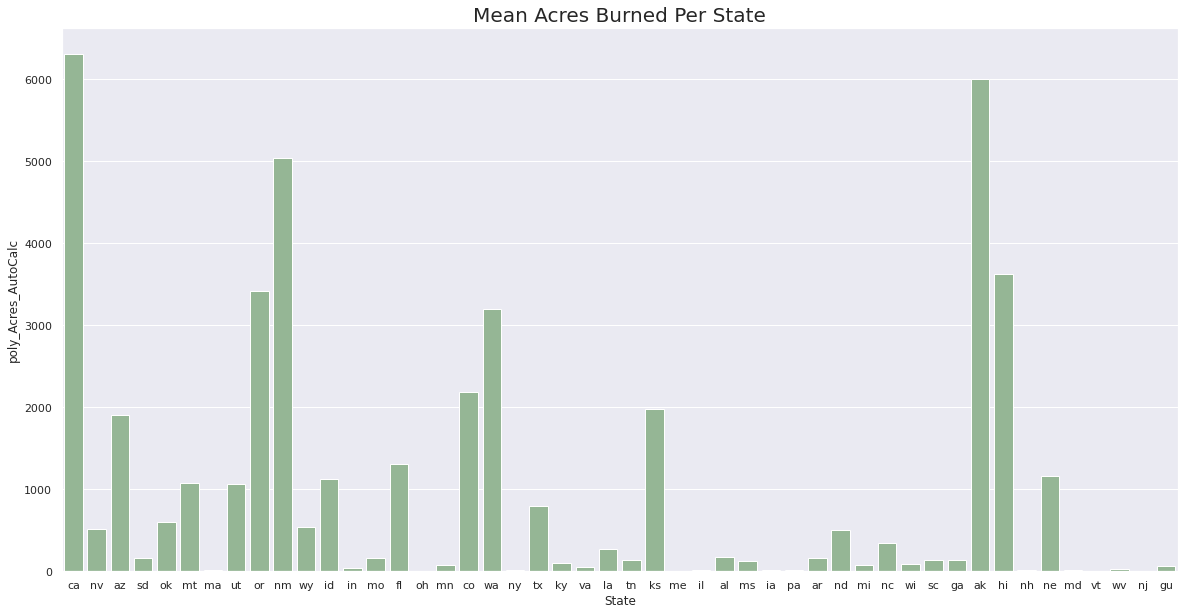

In [58]:
# bar plot of mean acres by state
ax = sns.barplot(data=data,
            x='State',
            y='poly_Acres_AutoCalc',
            estimator = np.mean,
            color = 'darkseagreen',
            ci=None)
plt.title('Mean Acres Burned Per State', fontsize=20)
plt.show()

## Map Visuals

In [25]:
# Plotly - Fire Cause
fig = px.scatter_mapbox(data, lat="irwin_InitialLatitude", lon="irwin_InitialLongitude", hover_name="irwin_FireCause", hover_data=["irwin_InitialLatitude", "irwin_InitialLongitude"],
                        color="irwin_FireCause", zoom=5, height=500)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [27]:
# Heat Map using Folium

heat_map = folium.Map(location=[48, -102],
                    zoom_start = 10, min_zoom=1) 

heat_df = data[['irwin_InitialLatitude', 'irwin_InitialLongitude']]
heat_df = heat_df.dropna(axis=0, subset=['irwin_InitialLatitude','irwin_InitialLongitude'])

heat_data = [[row['irwin_InitialLatitude'],row['irwin_InitialLongitude']] for index, row in heat_df.iterrows()]

HeatMap(heat_data, radius=10).add_to(heat_map)

heat_map

In [29]:
# pandas cross tabulate 
table = pd.crosstab(data.irwin_FireCause, data.State)
table

State             ak  al  ar   az   ca   co   fl  ga  gu  hi  ia   id  il  in  ks  ky  la  ma  md   me   mi   mn   mo   ms   mt  nc  nd  ne  nh  nj   nm   nv  ny  oh   ok   or  pa  sc   sd  tn   tx  \
irwin_FireCause                                                                                                                                                                                         
human            170  34  74  551  372  126  172  38   2   5  17  564  34  37  29  38  57  78   6  249  111  526  251  194  548  37  79  44   5   1  106  393   7  36  410  190   8  10  321  18  281   
natural          416   4  12  289  225  144  105   3   0   0   0  382   0   0   3   1   2   0   0    7    4   52    1    3  443   4  13  24   1   0   70  199   0   2    6  384   0   3   96   0   88   
undetermined      13  13  31   35  267   31   35   4   2   1   0   37   0   2   2  25  21  16   0    9   32  128   17   47  126   6  10   7   2   0   41   55   0   9   15   61   0  14   18   5  421   
unknown            0  14  29   12  137   26   25   5   0   0   0    9   4   1   2   5   7   1   0    2    4   68   35   19   38   1   8   0   0   0   11   15   0   3    5   29   2   5   16   5   20   

State             ut  va  vt   wa  wi  wv   wy  
irwin_FireCause                                 
human            283  33   1  217  13   7  216  
natural          146   2   0   87   0   0  217  
undetermined       8   3   3  151  65   1  133  
unknown            5   4   0   27  15   0   73